# PH 354 - HW1 
## Atharv Sagar Suryawanshi

In [1]:
# relevant modules
import numpy as np
import os
import matplotlib.pyplot as plt

###  Exercise 1: A ball dropped from a tower

In [2]:
height = 100
def time_taken_to_reach_ground(height): # height in m
    time = (2*height/9.8)**0.5
    return time

print(f"Time taken to reach the ground from a height of {height} m is {time_taken_to_reach_ground(height):.3f} s")

Time taken to reach the ground from a height of 100 m is 4.518 s


###  Exercise 2: Altitude of a satellite

#### a)

In [3]:
def altitude_of_revol(time): # time in sec
    # constants in SI
    G = 6.6743E-11
    M = 5.972E24
    R = 6.371E6
    r = ((G*M)*(time**2)/(4*np.pi**2))**(1/3)
    alt = r - R
    return alt

#### b)

In [4]:
print(f"Altitude every 24 hrs is {altitude_of_revol(24 * 3600)/ 1000:.3f} km")

print(f"Altitude every 90 mins is {altitude_of_revol(90 * 60)/ 1000:.3f} km")

print(f"Altitude every 45 mins is {altitude_of_revol(45 * 60)/1000:.3f} km")

Altitude every 24 hrs is 35869.698 km
Altitude every 90 mins is 281.493 km
Altitude every 45 mins is -2180.192 km


From the last calculation, we conclude that for a satellite to revolve so fast, it should be positioned closer to the centre of the earth than the radius of the earth. This is necessary to meet the substantial centripetal force requirements.

#### c)
24 hrs is time taken for Sun to be in the same position wrt stars in the sky (solar day) whlie 23.93 hrs is the time it takes for the Earth to actually rotate wrt the to the stars.

In [5]:
print(f"Difference of altitude between the two orbits is {(altitude_of_revol(24*3600) - altitude_of_revol(23.93 * 3600))/1000:.3f} km")

Difference of altitude between the two orbits is 82.175 km


### Exercise 3

In [6]:
def polar_coords(x, y):
    r = (x**2 + y**2)**0.5
    theta = np.arctan2(y, x)*180.0/np.pi
    if theta < 0:
        theta += 360
    return r, theta

x, y = 1, -0.0001
r, theta = polar_coords(x,y)
print(f"Polar coordinates of {(x,y)} are {(r, theta)}")

Polar coordinates of (1, -0.0001) are (1.000000005, 359.9942704220678)


###  Exercise 4

In [7]:
def time_wrt_rest(x, v):
    return x/v # time in years

def time_wrt_traveller(x, v):
    gamma = 1/(1- v**2)**0.5
    return x/v/gamma

print(f"Time taken to travel 10 light years at 0.99c is {time_wrt_rest(10, 0.99):.3f} years in rest frame and {time_wrt_traveller(10, 0.99):.3f} years in passengers's frame.")   

Time taken to travel 10 light years at 0.99c is 10.101 years in rest frame and 1.425 years in passengers's frame.


###  Exercise 5: Quantum potential step

In [8]:
def quantum_step(m, E, V):
    h_bar = 1.05E-34
    E *= 1.6E-19 # conversion to joule 
    V *= 1.6E-19
    k1 = ((2*m/h_bar)*(E/h_bar))**0.5
    k2 = ((2*m/h_bar)*(E - V)/h_bar)**0.5
    reflection_prob = ((k1 - k2)/(k1 + k2))**2
    transmission_prob = 4*k1*k2/(k1 + k2)**2
    return reflection_prob, transmission_prob

refl_prob, transm_prb = quantum_step(9.11E-31, 10, 9)
print(f"For the given values of mass, energy and potential, the reflection probability is {refl_prob:.3f} and transmission probability is {transm_prb:.3f}")


For the given values of mass, energy and potential, the reflection probability is 0.270 and transmission probability is 0.730


### Exercise 6: Catalan numbers

In [9]:
def catalan_numbers(upper_bound):
    C_n = 1
    n = 0
    while C_n <= upper_bound:
        print(int(C_n))
        C_n *= (4*n + 2)/(n + 2)
        n += 1

catalan_numbers(1E9)

1
1
2
5
14
42
132
429
1430
4862
16796
58786
208012
742900
2674440
9694845
35357670
129644790
477638700


###  Exercise 7: The Madelung constant

In [10]:
def potential(i, j, k):
    # const = e/(4*pi*epsilon_not) = 1
    potential = 1/(i**2 + j**2 + k**2 + 1E-20)**0.5 # small epsilon to avoid runtime error
    return potential

def total_potential(lower, upper):
    indices = np.arange(lower, upper)
    i, j, k = np.meshgrid(indices, indices, indices, indexing='ij')
    indices_not_origin = (i != 0) | (j != 0) | (k != 0)
    potentials = potential(i, j, k)
    sign = np.where((i + j + k)%2 == 0, 1, -1)
    V = np.sum(sign[indices_not_origin] * potentials[indices_not_origin])
    return V

print(f"The value of Madelung constant is estimated as {total_potential(-100,100) :.10f}")

The value of Madelung constant is estimated as -1.7475645950


###  Exercise 8: The semi-empirical mass formula
#### a)

In [11]:
def binding_energy(A, Z):
    A, Z = np.asarray(A), np.asarray(Z)
    a1, a2, a3, a4 = 15.67, 17.23, 0.75, 93.4
    a5 = np.zeros_like(A) 
    even_A = (A % 2 == 0)
    even_Z = (Z % 2 == 0)
    a5[~even_A & even_Z] = 12.0   # Odd A, even Z
    a5[~even_A & ~even_Z] = -12.0 # Odd A, odd Z
    B = a1*A - a2*A**(2/3) - a3* Z**2 /A**(1/3) - a4*(A -2*Z)**2/A + a5/A**0.5
    return B

print(f" Binding energy for A = 58 and Z = 28 is {binding_energy(58, 28):.3f} MeV")
    

 Binding energy for A = 58 and Z = 28 is 492.346 MeV


#### b)

In [12]:
def binding_energy_per_nucleon(A, Z):
    # vectorized code for efficiency
    A, Z = np.asarray(A), np.asarray(Z)
    a1, a2, a3, a4 = 15.67, 17.23, 0.75, 93.4
    a5 = np.zeros_like(A) # initial value of 0
    even_A = (A % 2 == 0)
    even_Z = (Z % 2 == 0)
    a5[~even_A & even_Z] = 12.0   # Odd A, even Z
    a5[~even_A & ~even_Z] = -12.0 # Odd A, odd Z
    B = a1*A - a2*A**(2/3) - a3* Z**2 /A**(1/3) - a4*(A -2*Z)**2/A + a5/A**0.5
    return B/A
print(f" Binding energy per nucleon for A = 58 and Z = 28 is {binding_energy_per_nucleon(58, 28):.3f} MeV/n")

 Binding energy per nucleon for A = 58 and Z = 28 is 8.489 MeV/n


#### c)

In [13]:
def stable_nucleus_A(Z):
    A_array = np.arange(Z, 3*Z+1)
    B_per_nucleons = binding_energy_per_nucleon(A_array, Z)
    return A_array[np.argmax(B_per_nucleons)], B_per_nucleons[np.argmax(B_per_nucleons)]

A, B = stable_nucleus_A(28)
print(f"Most stable nucleus for Z = 28 is A = {A} with binding energy per nucleon = {B:.3f} MeV/n")

Most stable nucleus for Z = 28 is A = 57 with binding energy per nucleon = 8.512 MeV/n


In [14]:
stable_nucleus_A(22), stable_nucleus_A(21), stable_nucleus_A(23), stable_nucleus_A(24)

((45, 8.551617199504346),
 (44, 8.467222047603626),
 (48, 8.492455645963966),
 (49, 8.548252076443807))

#### d)

For Z = 1, most stable nucleus is A = 2.0 with binding energy per nucleon = 1.697 MeV/n
For Z = 2, most stable nucleus is A = 4.0 with binding energy per nucleon = 4.343 MeV/n
For Z = 3, most stable nucleus is A = 6.0 with binding energy per nucleon = 5.569 MeV/n
For Z = 4, most stable nucleus is A = 8.0 with binding energy per nucleon = 6.305 MeV/n
For Z = 5, most stable nucleus is A = 10.0 with binding energy per nucleon = 6.802 MeV/n
For Z = 6, most stable nucleus is A = 13.0 with binding energy per nucleon = 7.162 MeV/n
For Z = 7, most stable nucleus is A = 14.0 with binding energy per nucleon = 7.432 MeV/n
For Z = 8, most stable nucleus is A = 17.0 with binding energy per nucleon = 7.719 MeV/n
For Z = 9, most stable nucleus is A = 18.0 with binding energy per nucleon = 7.808 MeV/n
For Z = 10, most stable nucleus is A = 21.0 with binding energy per nucleon = 8.043 MeV/n
For Z = 11, most stable nucleus is A = 22.0 with binding energy per nucleon = 8.049 MeV/n
For Z = 12, most stable

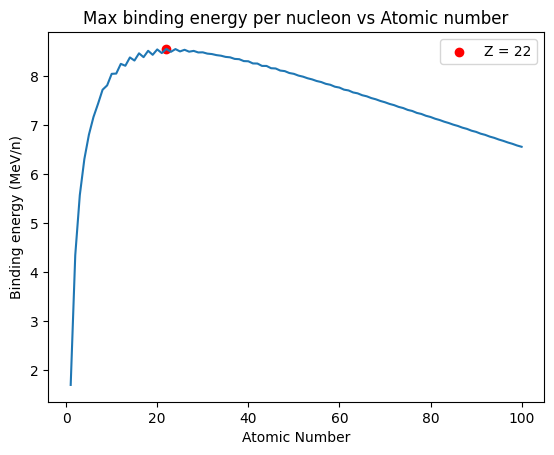

Maximum binding energy per nucleon is 8.552 MeV/n for Z = 22


In [15]:
def stable_nucleus_for_Z(lower, upper):
    stable_A, stable_B = np.zeros(upper-lower), np.zeros(upper-lower)
    for Z in np.arange(lower, upper):
        stable_A[Z-1], stable_B[Z-1] = stable_nucleus_A(Z) # correction for indexing 
        print(f"For Z = {Z}, most stable nucleus is A = {stable_A[Z-1]} with binding energy per nucleon = {stable_B[Z-1]:.3f} MeV/n")
    return stable_A, stable_B, np.arange(lower, upper)  

stable_A, stable_B, Z_values = stable_nucleus_for_Z(1, 101) # from 1 to 100
plt.title("Max binding energy per nucleon vs Atomic number")
plt.plot(Z_values, stable_B)
plt.scatter(np.argmax(stable_B)+1, np.max(stable_B), color='red', label = f"Z = {np.argmax(stable_B)+1}")
plt.ylabel("Binding energy (MeV/n)")
plt.xlabel("Atomic Number")
plt.legend()
plt.show()
print(f"Maximum binding energy per nucleon is {np.max(stable_B):.3f} MeV/n for Z = {np.argmax(stable_B)+1}")

### Exercise 9: Binomial coefficients
#### a)

In [16]:
def factorial(n):
    return int(np.prod(np.arange(1, n+1)))

def nCr_old(n, k): # overflows and dies 
    if n < k:
        return 0
    return int(factorial(n)/ (factorial(n - k) * factorial(k)))

def nCr(n, k):
    if n < k:
        return 0
    if k == 0 | n == k:
        return 1
    k = min(k, n-k)
    output = 1
    for i in range(1, k+1): # performs multiplication, one step at a time preventing overflow
        output *= (n - i + 1)/(i)
    return int(np.rint(output))
print(nCr(5, 3), nCr(20, 10))    

10 184756


#### b)

In [17]:
def print_pascal(N):
    for n in np.arange(N+1):
        row = [nCr(n, k) for k in np.arange(n+1)]
        print(" ".join(map(str, row)))

print_pascal(20)

1
1 1
1 2 1
1 3 3 1
1 4 6 4 1
1 5 10 10 5 1
1 6 15 20 15 6 1
1 7 21 35 35 21 7 1
1 8 28 56 70 56 28 8 1
1 9 36 84 126 126 84 36 9 1
1 10 45 120 210 252 210 120 45 10 1
1 11 55 165 330 462 462 330 165 55 11 1
1 12 66 220 495 792 924 792 495 220 66 12 1
1 13 78 286 715 1287 1716 1716 1287 715 286 78 13 1
1 14 91 364 1001 2002 3003 3432 3003 2002 1001 364 91 14 1
1 15 105 455 1365 3003 5005 6435 6435 5005 3003 1365 455 105 15 1
1 16 120 560 1820 4368 8008 11440 12870 11440 8008 4368 1820 560 120 16 1
1 17 136 680 2380 6188 12376 19448 24310 24310 19448 12376 6188 2380 680 136 17 1
1 18 153 816 3060 8568 18564 31824 43758 48620 43758 31824 18564 8568 3060 816 153 18 1
1 19 171 969 3876 11628 27132 50388 75582 92378 92378 75582 50388 27132 11628 3876 969 171 19 1
1 20 190 1140 4845 15504 38760 77520 125970 167960 184756 167960 125970 77520 38760 15504 4845 1140 190 20 1


#### c)

In [18]:
def coin_toss_nk_prob(n, k):
    return nCr(n, k)/2**n

def prob_head(N, K):
    array = np.array([coin_toss_nk_prob(N, k) for k in np.arange(K, N+1)])
    return array.sum()

print(f"Probability of getting 60 of 100 tosses as heads is {coin_toss_nk_prob(100, 60):.5f}")
print(f"Probability of getting 60 or more of 100 tosses as heads is {prob_head(100, 60):.5f}")

Probability of getting 60 of 100 tosses as heads is 0.01084
Probability of getting 60 or more of 100 tosses as heads is 0.02844


###  Exercise 10: Plotting experimental data
#### a)

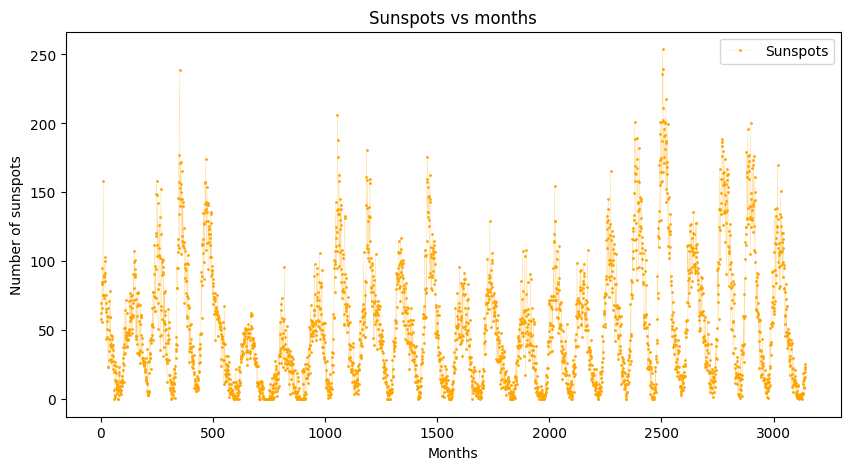

In [19]:
# open file
time, sunspots = [], [] 
with open("data/sunspots.txt") as f:
    for line in f:
        row = line.strip().split("\t")
        time.append(row[0])
        sunspots.append(row[1])

sunspots_array = [float(x) for x in sunspots]
time_array = [int(x) for x in time]
plt.figure(figsize=(10,5))
plt.plot(time_array, sunspots_array,color='orange', linewidth=0.1, marker='o', markersize=1, label="Sunspots")
plt.xticks()
plt.title("Sunspots vs months")
plt.xlabel("Months")
plt.ylabel("Number of sunspots")
plt.legend()
plt.show()

#### b)

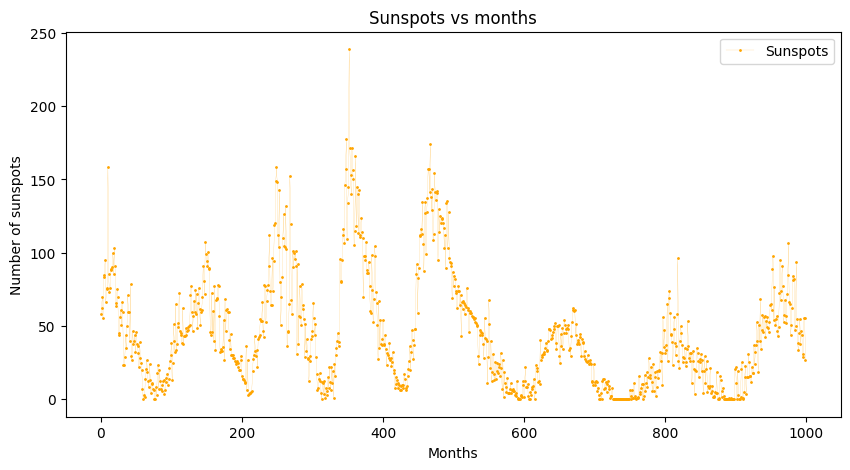

In [20]:
plt.figure(figsize=(10,5))
plt.plot(time_array[:1000] ,sunspots_array[:1000],color='orange', linewidth=0.1, marker='o', markersize=1, label="Sunspots")
plt.xticks()
plt.title("Sunspots vs months")
plt.xlabel("Months")
plt.ylabel("Number of sunspots")
plt.legend()
plt.show()

#### c)

In [21]:
def running_average(array, half_window):
    smooth_array = [
        np.mean([array[k+m] for m in range(-half_window, half_window + 1 )]) 
                    for k in range(half_window,len(array) - half_window)
                    ]
    return smooth_array


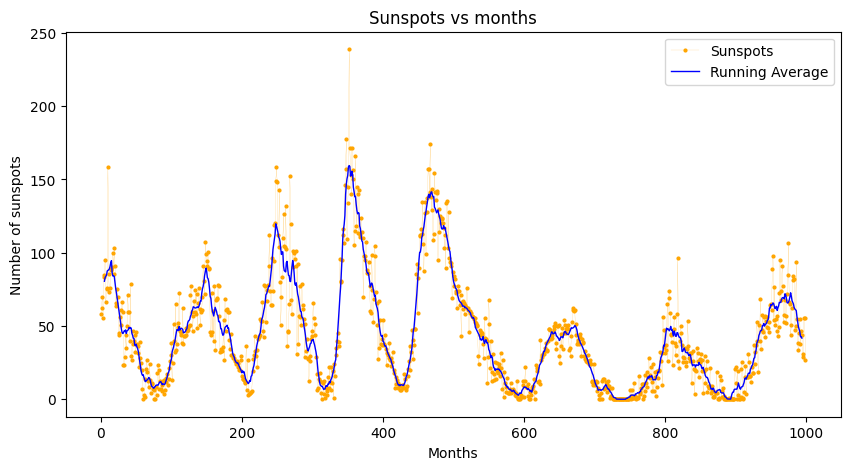

In [22]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(time_array[:1000], sunspots_array[:1000], color='orange', linewidth=0.1, marker='o', markersize=2, label="Sunspots")
plt.plot(time_array[5:1000-5], running_average(sunspots_array[:1000], 5), label="Running Average", color='blue', linewidth=1)
plt.xticks()
plt.title("Sunspots vs months")
plt.xlabel("Months")
plt.ylabel("Number of sunspots")
plt.legend()
plt.show()

###  Exercise 11: Curve plotting
#### a)

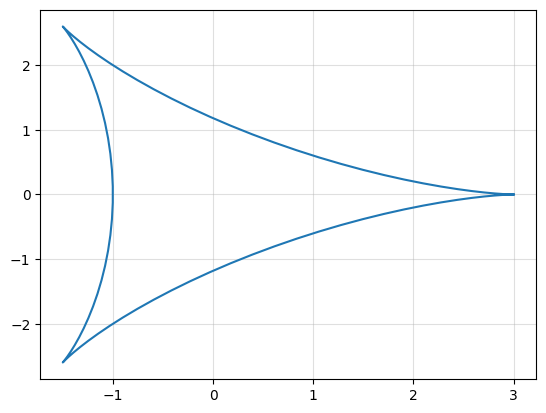

In [23]:
x = [2*np.cos(theta) + np.cos(2*theta) for theta in np.linspace(0, 2*np.pi, 100)]
y = [2*np.sin(theta) - np.sin(2*theta) for theta in np.linspace(0, 2*np.pi, 100)]

plt.plot(x, y)
plt.grid(True, alpha = 0.4)
plt.show()

#### b)

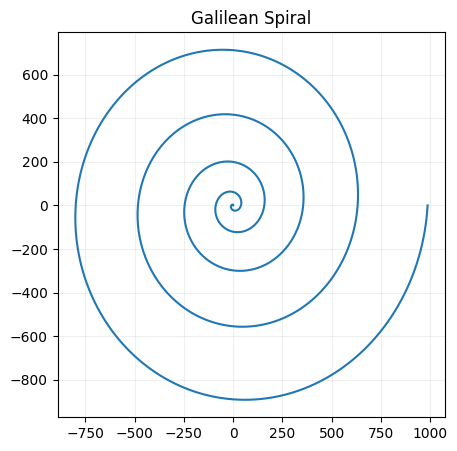

In [24]:
thetas_gal_spiral = np.linspace(0, 10*np.pi, 1000)
r_gal_spiral = [theta**2 for theta in thetas_gal_spiral]
x_gal_spiral = [r_gal_spiral[i]*np.cos(theta) for i, theta in enumerate(thetas_gal_spiral)]
y_gal_spiral = [r_gal_spiral[i]*np.sin(theta) for i, theta in enumerate(thetas_gal_spiral)]

plt.figure(figsize=(5,5))
plt.title("Galilean Spiral")
plt.plot(x_gal_spiral, y_gal_spiral)
plt.grid(True, alpha = 0.2)
plt.show()

#### c)

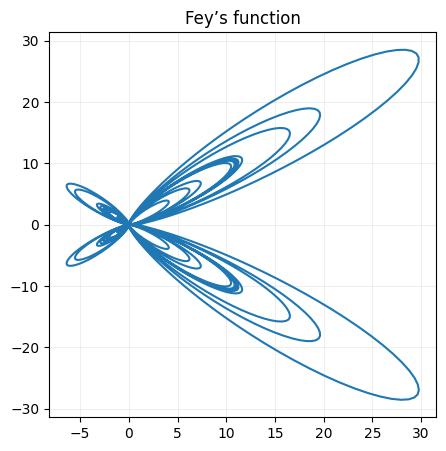

In [25]:
thetas_fey = np.linspace(0, 24*np.pi, 5000)
def fey_fun(theta):
    return np.exp(np.cos(theta) - 2*np.cos(4*theta) + np.sin(theta/12)**5)
r_fey = [fey_fun(theta) for theta in thetas_fey]
x_fey = [r_fey[i]*np.cos(theta) for i, theta in enumerate(thetas_fey)]
y_fey = [r_fey[i]*np.sin(theta) for i, theta in enumerate(thetas_fey)]

plt.figure(figsize=(5,5))
plt.title("Fey’s function")
plt.plot(x_fey, y_fey)
plt.grid(True, alpha = 0.2)
plt.show()

### Exercise 12: Deterministic chaos and the Feigenbaum plot

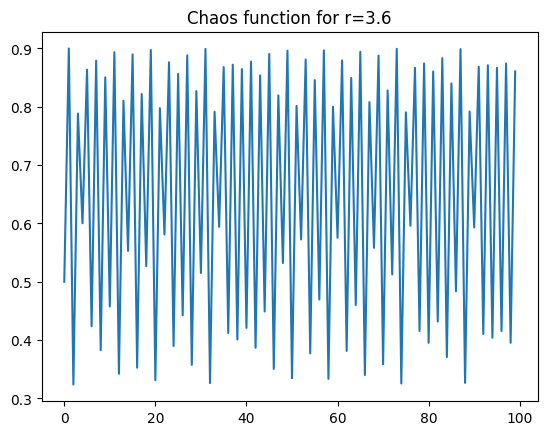

In [69]:
def chaos_fn(r, x0, iter):
    array = np.zeros(iter)
    array[0] = x0
    for i in range(1, iter):
        array[i] = r*array[i-1]*(1 - array[i-1])
    return array

r = 3.6
plt.plot(chaos_fn(r, 0.5, 100))
plt.title(f"Chaos function for r={r}")
plt.show()


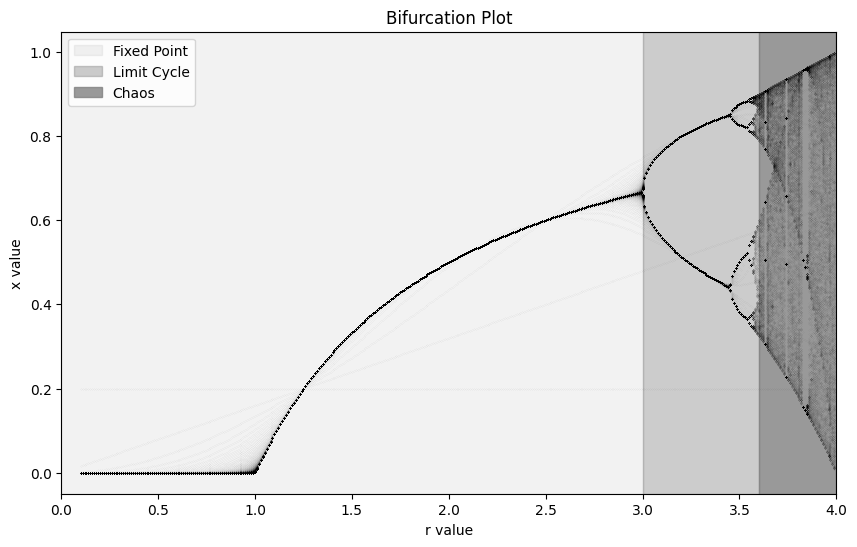

In [70]:
# r-x plots
r_values = np.arange(0.1, 4, 0.01)
x_points = np.zeros((len(r_values), 1000))
for i, r in enumerate(r_values):
    x_points[i,:] = chaos_fn(r, 0.2, 1000)

plt.figure(figsize=(10,6))
plt.title("Bifurcation Plot")
plt.xlabel("r value")
plt.ylabel("x value")
plt.xlim(0, 4)
plt.axvspan(0, 3, color='gray', alpha=0.1, label = "Fixed Point")
plt.axvspan(3, 3.6, color='gray', alpha=0.4, label = "Limit Cycle")
plt.axvspan(3.6, 4, color='gray', alpha=0.8, label = "Chaos")
for i, r in enumerate(r_values):
    plt.scatter([r] * 1000, x_points[i, :], color="black", alpha=0.3, marker='.', s=0.01)
plt.legend()
plt.show()

faster method for calculation of plot (as mentioned in the pdf)

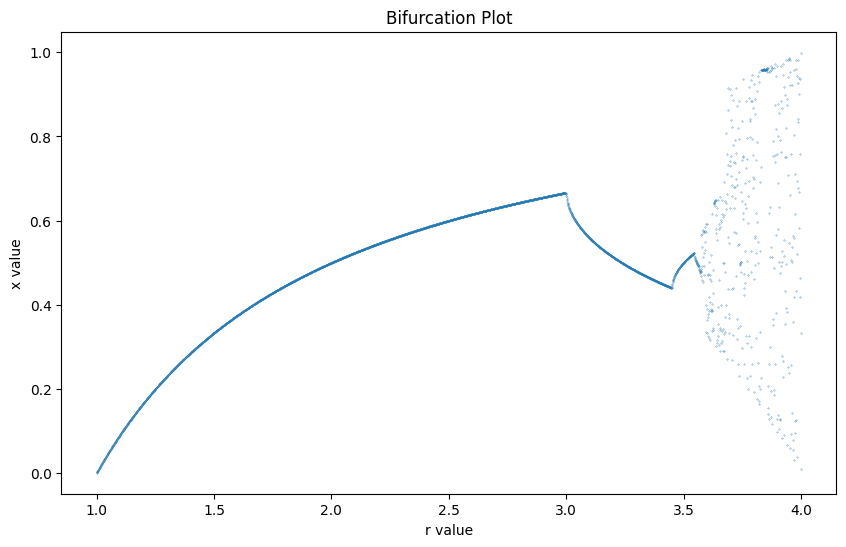

In [46]:
r_values = np.arange(1, 4, 0.001)
x_values = np.ones_like(r_values)*0.5
for i in range(1000):
    x_values = r_values*x_values*(1-x_values)

plt.figure(figsize=(10,6))
plt.title("Bifurcation Plot")
plt.xlabel("r value")
plt.ylabel("x value")
plt.ylabel
plt.plot(r_values, x_values, alpha=1, marker='.', markersize = 0.5, lw = 0)
plt.show()